#                        10 Steps in Pandas to Process LAS File and Plot

The following list of steps I use most:<br>
1) Reading File <br>
2) Data Inspection<br>
3) Column Selection<br>
4) Missing Data<br>
5) Dropping Rows<br>
6) Statistics<br>
7) Filtering<br>
8) Adding Column<br>
9) Indexing<br>
10) Plotting<br>

### 1) Reading File <br>

In [38]:
# pip install lasio
# pip install -r optional-packages.txt
# pip install --upgrade lasio

import lasio         #read LAS file data
import pandas as pd
import numpy as np
import os

In [39]:
las = lasio.read('1050383876.las')

In [40]:
df = las.df()

In [41]:
las.curves

[CurveItem(mnemonic=DEPT, unit=FT, value=0 000 00 00, descr=Depth, original_mnemonic=DEPT, data.shape=(7056,)),
 CurveItem(mnemonic=CNPOR, unit=PU, value=0, descr=CN Selected Porosity, original_mnemonic=CNPOR, data.shape=(7056,)),
 CurveItem(mnemonic=DCAL, unit=IN, value=0, descr=Caliper from Density Tool, original_mnemonic=DCAL, data.shape=(7056,)),
 CurveItem(mnemonic=DPOR, unit=PU, value=0, descr=Density Porosity, original_mnemonic=DPOR, data.shape=(7056,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=0, descr=Gamma Ray, original_mnemonic=GR, data.shape=(7056,)),
 CurveItem(mnemonic=RHOB, unit=G/CC, value=0, descr=Bulk Density, original_mnemonic=RHOB, data.shape=(7056,)),
 CurveItem(mnemonic=RHOC, unit=G/CC, value=0, descr=Density Correction, original_mnemonic=RHOC, data.shape=(7056,)),
 CurveItem(mnemonic=RILD, unit=OHM-M, value=0, descr=DIL Deep Resistivity, original_mnemonic=RILD, data.shape=(7056,)),
 CurveItem(mnemonic=RILM, unit=OHM-M, value=0, descr=DIL Medium Resistivity, origi

### 2) Data Inspection <br>

In [42]:
df.head()

,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
DEPT,,,,,,,,,,,,,,,,,
6.0,NaN,NaN,NaN,23.8362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.5,NaN,NaN,NaN,28.8864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,33.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.5,NaN,NaN,NaN,34.6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,36.0153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(7056, 17)

In [7]:
df.columns

Index(['CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM', 'RLL3',
       'RXORT', 'SP', 'MEL15', 'MEL20', 'DT', 'ITT', 'MELCAL', 'SPOR'],
      dtype='object')

### 3) Column Selection

In [8]:
df_selected = df[['CNPOR', 'GR', 'RHOB', 'DT', 'MELCAL', 'SPOR']]

### 4) Missing Data

In [10]:
df_dropped = df_selected.dropna(subset=['GR', 'DT', 'SPOR'],axis=0, how='any')

### 5) Dropping Rows

In [9]:
df_selected.isna().sum()

CNPOR     2064
GR          58
RHOB      2026
DT          51
MELCAL    2030
SPOR        51
dtype: int64

In [11]:
df_dropped.head()

,CNPOR,GR,RHOB,DT,MELCAL,SPOR
DEPT,,,,,,
24.0,NaN,63.1037,NaN,92.7520,NaN,31.9321
24.5,NaN,58.2448,NaN,92.9061,NaN,32.0411
25.0,NaN,52.1383,NaN,92.8725,NaN,32.0173
25.5,NaN,50.7750,NaN,92.6159,NaN,31.8359
26.0,NaN,57.7431,NaN,92.2255,NaN,31.5598


### 6) Statistics

In [12]:
df_dropped.describe()

,CNPOR,GR,RHOB,DT,MELCAL,SPOR
count,4992.000000,6962.000000,5010.000000,6962.000000,5010.000000,6962.000000
mean,19.184611,58.035839,2.494757,82.001241,8.805313,24.329025
std,7.939384,29.548550,0.207499,29.147369,2.242689,20.613416
min,-0.087500,5.712800,1.421800,36.290500,7.148400,-7.998200
25%,13.698600,36.854175,2.441700,63.909100,7.773200,11.533975
50%,19.939850,54.724650,2.542100,74.307050,7.929500,18.887600
75%,24.594525,74.357100,2.617100,91.237475,8.648550,30.861000
max,45.596600,345.344000,2.978700,275.567300,18.451900,161.221500


### 7) Filtering

Based of petrophysical knowledge, these logs normal range in rocks:

|Log|Min|Max|
|--|----|---|
|CNPOR|-15|50|
|GR|0|250|
|RHOB|1|3|
|DT|30|140|
|SPOR|-10|50|


In [25]:
df_filt = df_dropped[(df_dropped.CNPOR > -15) & (df_dropped.GR <= 50)]
df_filt = df_dropped[(df_dropped.GR > 0) & (df_dropped.GR  <= 250)]
df_filt = df_dropped[(df_dropped.RHOB> 1) & (df_dropped.RHOB<= 3)]
df_filt = df_dropped[(df_dropped.DT > 30) & (df_dropped.DT <= 140)]


### 8) Adding Column

In [43]:
df = df_filt.copy()

In [44]:
df['Vsh'] = (df.GR - df.GR.min()) / (df.GR.max() - df.GR.min())

In [45]:
df.head(2)

,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
DEPT,,,,,,,
24.0,NaN,63.1037,NaN,92.7520,NaN,31.9321,0.168980
24.5,NaN,58.2448,NaN,92.9061,NaN,32.0411,0.154674


### 9) Indexing

In [46]:
df_idx = df.rename_axis('Depth').reset_index()
#df.reset_index(inplace = True, drop=True)
df_idx.head()  #

,Depth,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
0,24.0,NaN,63.1037,NaN,92.7520,NaN,31.9321,0.168980
1,24.5,NaN,58.2448,NaN,92.9061,NaN,32.0411,0.154674
2,25.0,NaN,52.1383,NaN,92.8725,NaN,32.0173,0.136694
3,25.5,NaN,50.7750,NaN,92.6159,NaN,31.8359,0.132680
4,26.0,NaN,57.7431,NaN,92.2255,NaN,31.5598,0.153196


In [47]:
df.describe()

,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
count,4975.000000,6695.000000,4993.000000,6695.000000,4993.000000,6695.000000,6695.000000
mean,19.147193,57.911395,2.495011,77.550568,8.803699,21.181449,0.153692
std,7.919623,30.057569,0.207789,17.349883,2.246015,12.270073,0.088501
min,-0.087500,5.712800,1.421800,36.290500,7.148400,-7.998200,0.000000
25%,13.676450,36.282900,2.442500,63.477750,7.770500,11.228950,0.090010
50%,19.886100,54.042200,2.542700,73.465000,7.928300,18.292100,0.142300
75%,24.569350,75.001600,2.617400,88.949600,8.647300,29.243000,0.204012
max,45.596600,345.344000,2.978700,139.677100,18.451900,65.118200,1.000000


### 10) Plotting

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib as mpl

In [32]:
def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12,8))
    ax[0].plot(logs.GR, logs.Depth, color='green')
    ax[1].plot(logs.CNPOR, logs.Depth, color='red')
    ax[2].plot(logs.DT, logs.Depth, color='black')
    ax[3].plot(logs.MELCAL, logs.Depth, color='blue')
    ax[4].plot(logs.RHOB, logs.Depth, color='c')
    ax[5].plot(logs.Vsh, logs.Depth, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("CNPOR")
    ax[1].set_xlim(logs.CNPOR.min(),logs.CNPOR.max())
    ax[2].set_xlabel("DT")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("MELCAL")
    ax[3].set_xlim(logs.MELCAL.min(),logs.MELCAL.max())
    ax[4].set_xlabel("RHOB")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[5].set_xlabel("Vsh")
    ax[5].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]) 
    
    f.suptitle('Well:KOOCHEL MOUNTAIN #1', fontsize=14,y=0.94)

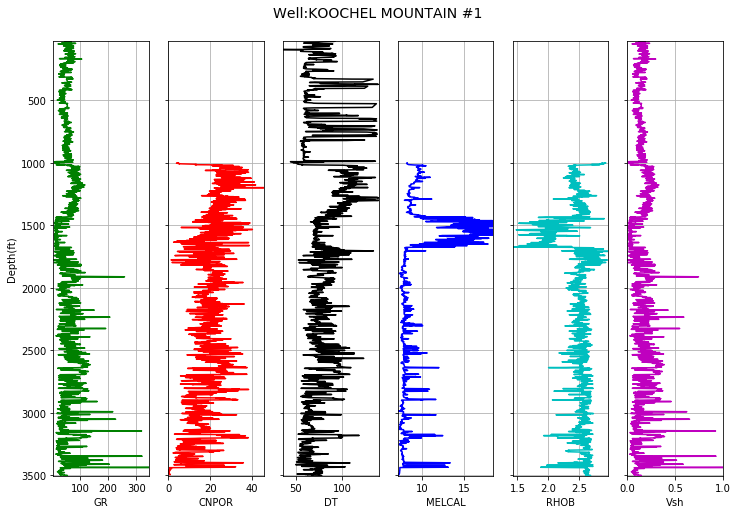

In [37]:
log_plot(df_idx)
#plt.savefig('well_plot1.png', dpi=400)